In [13]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/emilia/Documents/Hw6/chess+king+rook+vs+king/krkopt.data",sep=",", header=None)
df.columns = ['white-king-columna','white-king-wiersz','white-rook-columna','white-rook-wiersz','black-king-columna','black-king-wiersz','white-depth-of-win']

Oczyszczanie danych

In [4]:
df[['white-king-columna','white-rook-columna','black-king-columna']]=df[['white-king-columna','white-rook-columna','black-king-columna']].replace({
    "a" : 1,
    "b" : 2,
    "c" : 3,
    "d" : 4,
    "e" : 5,
    "f" : 6,
    "g" : 7,
    "h" : 8
})

/var/folders/3j/2gpghzzd5kz8m06gy17h79540000gn/T/ipykernel_45649/1882218657.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['white-king-columna','white-rook-columna','black-king-columna']]=df[['white-king-columna','white-rook-columna','black-king-columna']].replace({


In [5]:
df['white-depth-of-win'] = df['white-depth-of-win'].replace({
    'draw' : -1,
    'zero' : 0, 
    'one' : 1, 
    'two' : 2, 
    'three' : 3, 
    'four' : 4, 
    'five' : 5, 
    'six' : 6,
    'seven' : 7, 
    'eight' : 8, 
    'nine' : 9, 
    'ten' : 10, 
    'eleven' : 11, 
    'twelve' : 12, 
    'thirteen' : 13,
    'fourteen' : 14, 
    'fifteen' : 15, 
    'sixteen' : 16
})

/var/folders/3j/2gpghzzd5kz8m06gy17h79540000gn/T/ipykernel_45649/1517269738.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['white-depth-of-win'] = df['white-depth-of-win'].replace({


## **Pytanie 1** 

Gdzie zwykle znajduje się na planszy czarny król, kiedy jest matowany (white-depth-of-win=0)? Gdzie znajduje się, kiedy gra kończy się remisem (white-depth-of-win=-1)?

Opis zadania:

Tworze 2 pomocnicze ramki danych których są macierzą odwzorowywującą szachownice 8x8. Następnie tworze z nich heatmape. 
Ramki danych sa równiez sprawdzane by napewno mialy dobry wymiar.

In [6]:
zad1_mat =  df[df['white-depth-of-win'] == 0].groupby(['black-king-wiersz', 'black-king-columna']).size().unstack(fill_value=0)
zad1_mat = zad1_mat.reindex(index=range(1,9),columns=range(1,9),fill_value=0)
zad1_remis = df[df['white-depth-of-win'] == -1].groupby(['black-king-wiersz', 'black-king-columna']).size().unstack(fill_value=0)
zad1_remis = zad1_remis.reindex(index=range(1,9),columns=range(1,9),fill_value=0)

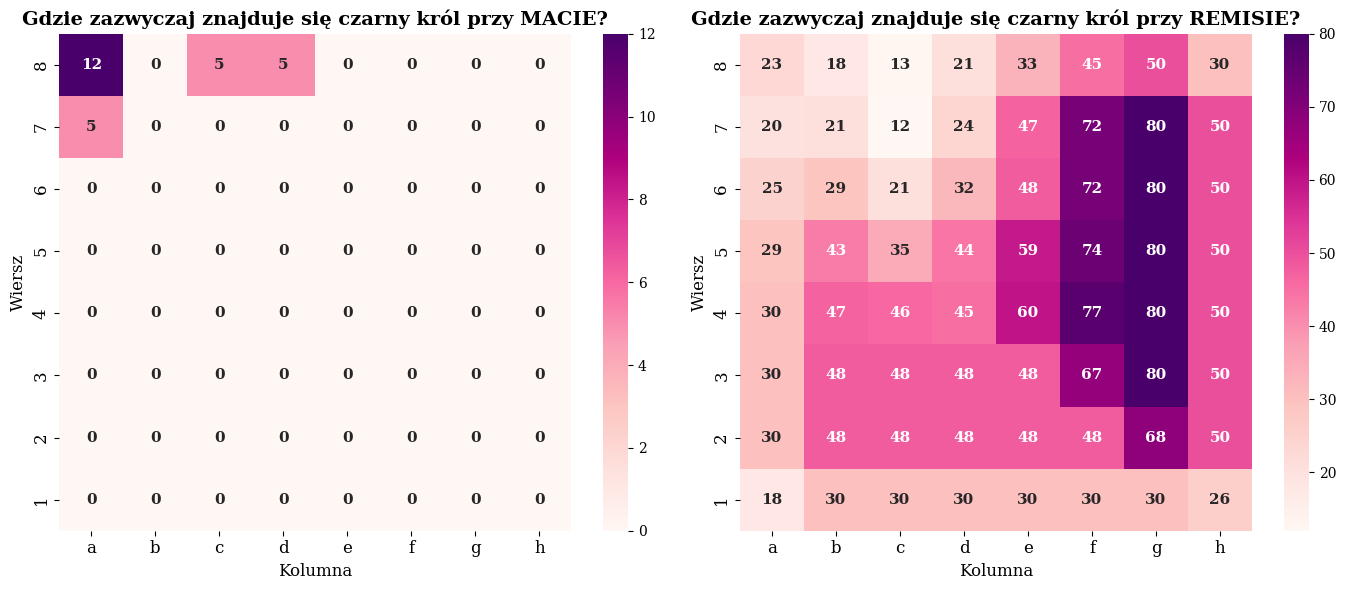

In [7]:
plt.rcParams['font.family'] = 'serif'
fig, axes = plt.subplots(1,2, figsize = (14,6))
styl_liczb = {"size": 11, "weight": "bold"}

sns.heatmap(zad1_mat, ax=axes[0], cmap='RdPu', annot=True, fmt='d', annot_kws=styl_liczb)
axes[0].set_title('Gdzie zazwyczaj znajduje się czarny król przy MACIE?', fontsize = 14,fontweight='bold')
axes[0].set_xlabel('Kolumna', fontsize = 12)
axes[0].set_ylabel('Wiersz', fontsize = 12)
axes[0].set_xticklabels(['a','b','c','d','e','f','g','h'], fontsize = 12)
axes[0].set_yticklabels(range(8, 0, -1), fontsize=12)

sns.heatmap(zad1_remis, ax=axes[1], cmap='RdPu', annot=True, fmt='d', annot_kws=styl_liczb)
axes[1].set_title('Gdzie zazwyczaj znajduje się czarny król przy REMISIE?',fontsize = 14,fontweight='bold')
axes[1].set_xlabel('Kolumna',fontsize =12)
axes[1].set_ylabel('Wiersz',fontsize =12)
axes[1].set_xticklabels(['a','b','c','d','e','f','g','h'],fontsize =12)
axes[1].set_yticklabels(range(8, 0, -1), fontsize=12)

plt.tight_layout()
plt.show()

### **Odpowiedź:**

Na podstawie heatmapy widać, ze w pozycjach zakończonych matem, czarny król najczęściej znajduje się na *krawędzi planszy*. Najczęściej znajduje się w polu **8a** -> skrajny naroznik.

Natomiast, gdy gra kończy się remisem to czarny król znajduje się w *centralnej częsci planszy*. Najczęsciej występowane pola to **3-7g**.

## **Pytanie 2** 

Jednym z istotnych czynników tego, w ilu ruchach gra się zakończy jest dystans pomiędzy białym królem a czarnym królem. Jaka metryka dystansu (Euklidesowa, Manhattan, lub Czebyszewa) pomiędzy nimi pozwoli najlepiej oszacować liczbę ruchów do zakończenia gry? Do tej analizy zignoruj sytuacje remisowe (white-depth-of-win = -1).

Opis zadania:

Tworze nowe kolumny w df z wyliczonymi metrykami podanymi w zadaniu. Następnie grupuje metrykę euklidesową i manhattan w celu polepszenia czytelności boxplotów. Następnie tworze wykresy boxplot i wyliczam od razy wspolczynnik korelacji.

In [8]:
x = abs(df['white-king-columna'] - df['black-king-columna'])
y = abs(df['white-king-wiersz'] - df['black-king-wiersz'])

df['Euklidesowa'] = np.sqrt(x**2+y**2)
df['Manhattan'] = x + y
df['Czebyszewa'] = np.maximum(x,y)

zad2 = df[df['white-depth-of-win'] != -1].reset_index(drop=True)

In [9]:
przedzialy_euclidesowa = [0, 2, 4, 6, 8, 12] 
nazwy_euclidesowa = ['0-2', '2-4', '4-6', '6-8', '8+']
zad2['group_euclidean'] = pd.cut(zad2['Euklidesowa'], bins=przedzialy_euclidesowa, labels=nazwy_euclidesowa, include_lowest=True)

przedzialy_manhattan = [0, 3, 6, 9, 12, 16]
nazwy_manhattan = ['0-2', '2-4', '4-6', '6-8', '8+']
zad2['group_manhattan'] = pd.cut(zad2['Manhattan'], bins=przedzialy_manhattan, labels=nazwy_manhattan, include_lowest=True)


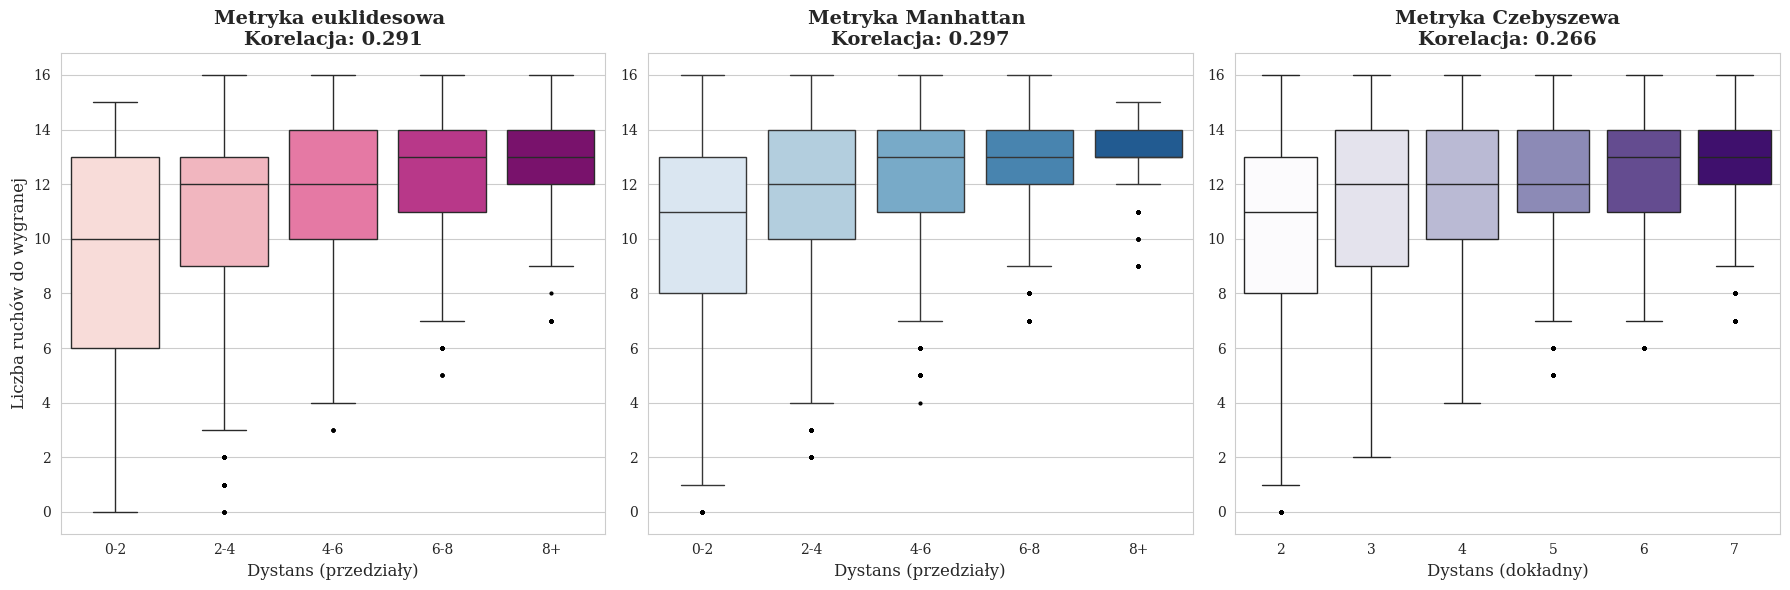

In [10]:
kropki = {
    "marker": "o",              
    "markerfacecolor": "black",
    "markeredgecolor": "black", 
    "markersize": 2             
}

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'serif'

fig2, axes2 = plt.subplots(1,3,figsize= (18,6))

sns.boxplot(x='group_euclidean', y='white-depth-of-win', data=zad2, ax=axes2[0], palette='RdPu',flierprops=kropki,hue='group_euclidean',legend=False)
corr_eucl = zad2['white-depth-of-win'].corr(zad2['Euklidesowa']) 
axes2[0].set_title(f'Metryka euklidesowa \nKorelacja: {corr_eucl:.3f}', fontsize=14, fontweight='bold')
axes2[0].set_xlabel('Dystans (przedziały)', fontsize=12)

sns.boxplot(x='group_manhattan', y='white-depth-of-win', data=zad2, ax=axes2[1], palette='Blues',flierprops=kropki,hue='group_manhattan',legend=False)
corr_man = zad2['white-depth-of-win'].corr(zad2['Manhattan'])
axes2[1].set_title(f'Metryka Manhattan \nKorelacja: {corr_man:.3f}', fontsize=14, fontweight='bold')
axes2[1].set_xlabel('Dystans (przedziały)', fontsize=12)

sns.boxplot(x='Czebyszewa', y='white-depth-of-win', data=zad2, ax=axes2[2], palette='Purples',flierprops=kropki,hue='Czebyszewa',legend=False)
corr_cheb = zad2['white-depth-of-win'].corr(zad2['Czebyszewa'])
axes2[2].set_title(f'Metryka Czebyszewa\nKorelacja: {corr_cheb:.3f}', fontsize=14, fontweight='bold')
axes2[2].set_xlabel('Dystans (dokładny)', fontsize=12)

axes2[0].set_ylabel('Liczba ruchów do wygranej', fontsize=12)
axes2[1].set_ylabel('')
axes2[2].set_ylabel('')

plt.tight_layout()
plt.show()


### **Odpowiedź:** 

Na podstawie 3 wykresów i współczynnika korelacji mona stwierdzić, ze **metryka Manhattan** najlepiej szacującuje liczbę kroków potrzebną do skończenia gry. Osiąga najwyzszą korelację oraz posiada najbardziej regularny wzrost mediany liczby ruchów wraz ze wzrostem dystansu pomiędzy królami.

## **Pytanie 3** 

Czy informacja o odległości czarnego króla od krawędzi planszy może być przydatna w określeniu w ilu ruchach zakończy się gra? Czy uzupełnienie tej informacji o odległość pomiędzy białym a czarnym królem z poprzedniego zadania może dodatkowo pomóc? Do tej analizy zignoruj sytuacje remisowe (white-depth-of-win = -1).

Opis zadania:

Pracuje na ramce danych z zadania2. Tworze nową kolumnę z odległościami czarnego króla od krańców planszy. Tworze w wykresy boxplot i heatmape. Do heatmapy wybieram metrykę Manhattan poniewa jest najlepszą metryką szacującą liczbę kroków do końca gry.

In [11]:
zad3 = zad2.copy()

zad3['dist_edge'] = np.minimum.reduce([zad3['black-king-columna'] - 1,8 - zad3['black-king-columna'],zad3['black-king-wiersz'] - 1,8 - zad3['black-king-wiersz']])

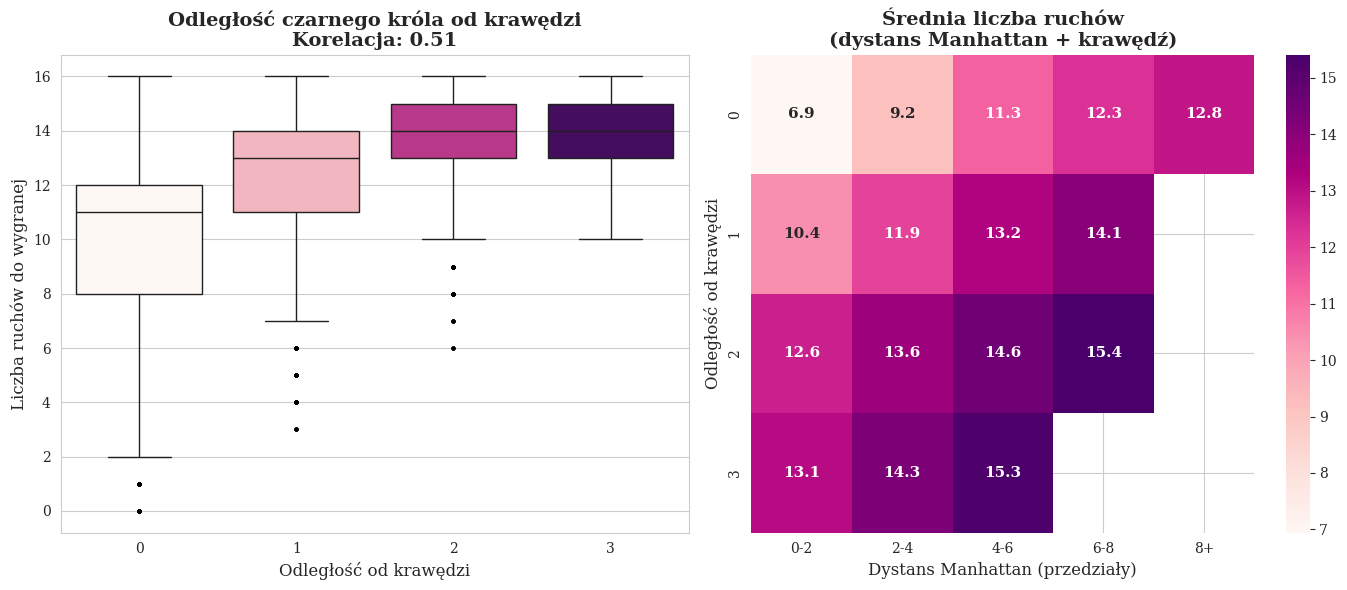

In [12]:
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'serif'
styl_liczb = {"size": 11, "weight": "bold"}

fig3, axes3 = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(x='dist_edge',y='white-depth-of-win',data=zad3,palette='RdPu',flierprops=kropki,ax=axes3[0],hue='dist_edge',legend=False,)
corr_edge = zad3['white-depth-of-win'].corr(zad3['dist_edge'])

axes3[0].set_title(f'Odległość czarnego króla od krawędzi\nKorelacja: {corr_edge:.2f}',fontsize=14,fontweight='bold')
axes3[0].set_xlabel('Odległość od krawędzi',fontsize=12)
axes3[0].set_ylabel('Liczba ruchów do wygranej',fontsize=12)

pivot = zad3.pivot_table(values='white-depth-of-win',index='dist_edge',columns='group_manhattan',aggfunc='mean',observed=False)

sns.heatmap(pivot,annot=True,fmt='.1f',cmap='RdPu',ax=axes3[1],annot_kws=styl_liczb)

axes3[1].set_title('Średnia liczba ruchów\n(dystans Manhattan + krawędź)',fontsize=14,fontweight='bold')
axes3[1].set_xlabel('Dystans Manhattan (przedziały)',fontsize=12)
axes3[1].set_ylabel('Odległość od krawędzi',fontsize=12)

plt.tight_layout()
plt.show()


### **Odpowiedź:**
Odległość czarnego króla od krawędzi planszy **jest bardzo powiązana** z ilością kroków potrzebnych do zakończenia gry. Gdy ta odległość rośnie, to rośnie równiez średnia liczba kroków do zakończenia gry. Potwierdza to dodani współczynnik korelacji.

Połączenie informacji o odległości czarnego króla od krawędzi planszy z dystansem Manhattan pomiędzy królami pozwala **jeszcze lepiej oszacować** liczbę ruchów. Widać,ze dla tego samego dystansu Manhattan, pozycje z czarnym królem przy krawędzi planszy pozwalają szybciej zakończyć rozgrywkę